## Apply PCA for a dataset given in the url, build a classification model and plot the graph

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
from ipynb.fs.full.ml_library import *

# reading dataset from file & storing it as pandas dataframe
wine_data = pd.read_csv('Wine.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
wine_data.info()       # observing datatypes of different columns & checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Separating out feature colums & label column 

In [3]:
x_values = wine_data.iloc[:,:-1].values
y_values = wine_data.iloc[:,-1].values

#### Splitting dataset into train set & test set

In [4]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
train_x_values = sc_x.fit_transform(train_x_values)
test_x_values = sc_x.transform(test_x_values)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_x_values = pca.fit_transform(train_x_values)
test_x_values = pca.transform(test_x_values)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394])

### Building Support Vector Machine (SVM) model

In [7]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf',random_state=0, probability=True)
classifier.fit(train_x_values, train_y_values)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Storing essential objects into pickle file

In [8]:
import joblib
file = open('DataProcessingWine.pkl', 'wb')
joblib.dump(sc_x, file)
joblib.dump(pca, file)
file.close()

file = open('PCASVMModelWine.pkl', 'wb')
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [9]:
test_prediction = classifier.predict(test_x_values)

### Evaluating model against test set 

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'\nAccuracy score: {accuracy_score(test_y_values, test_prediction)}')
print(f'\nClassification report:\n {classification_report(test_y_values, test_prediction)}')

Confusion matrix:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Accuracy score: 0.9722222222222222

Classification report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Plotting colormap for  classification

#### 1, 2 & 3 are different customer segments and PC1, PC2 are reduced features to 2 dimesions

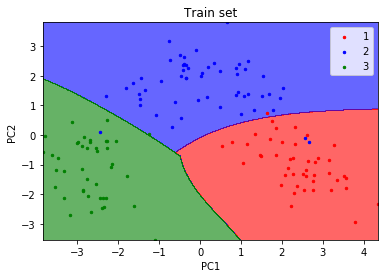

In [11]:
plot_colormap(train_x_values, train_y_values, classifier,'Train set')

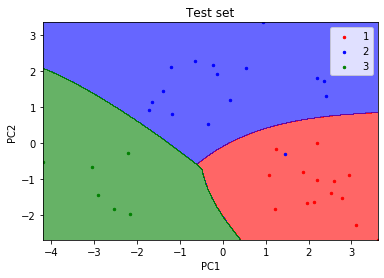

In [12]:
plot_colormap(test_x_values, test_y_values, classifier,'Test set')